Importing necessary libraries

In [ ]:
from sklearn import tree
import pandas as pd
import pydotplus
from IPython.display import Image

Impoting dataset and reading it

In [ ]:
from google.colab import files
uploded = files.upload()

Saving car_evaluation.csv to car_evaluation.csv


In [ ]:
import io
data = pd.read_csv(io.BytesIO(uploded['car_evaluation.csv']))

Printing data

In [ ]:
data

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good


Converting categorical data to numerical data
and printing it

In [ ]:
one_hot_data = pd.get_dummies(data[['Outlook','Temperature','Humidity','Windy']])

KeyError: ignored

In [ ]:
print(one_hot_data)

    outlook_overcast  outlook_rainy  outlook_sunny  temperature_cool  \
0                  0              0              1                 0   
1                  0              0              1                 0   
2                  1              0              0                 0   
3                  0              1              0                 0   
4                  0              1              0                 1   
5                  0              1              0                 1   
6                  1              0              0                 1   
7                  0              0              1                 0   
8                  0              0              1                 1   
9                  0              1              0                 0   
10                 0              0              1                 0   
11                 1              0              0                 0   
12                 1              0              0              

Creating decision tree classifier and training it

In [ ]:
clf = tree.DecisionTreeClassifier()

In [ ]:
clf_train = clf.fit(one_hot_data,data['Play'])

In [ ]:
dot_data = tree.export_graphviz(clf_train, out_file = None, feature_names = list(one_hot_data.columns.values))

In [ ]:
print(dot_data)

digraph Tree {
node [shape=box, fontname="helvetica"] ;
edge [fontname="helvetica"] ;
0 [label="Outlook_Overcast <= 0.5\ngini = 0.459\nsamples = 14\nvalue = [5, 9]"] ;
1 [label="Humidity_high <= 0.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="Windy_f <= 0.5\ngini = 0.32\nsamples = 5\nvalue = [1, 4]"] ;
1 -> 2 ;
3 [label="Temperature_mild <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]"] ;
2 -> 3 ;
4 [label="gini = 0.0\nsamples = 1\nvalue = [1, 0]"] ;
3 -> 4 ;
5 [label="gini = 0.0\nsamples = 1\nvalue = [0, 1]"] ;
3 -> 5 ;
6 [label="gini = 0.0\nsamples = 3\nvalue = [0, 3]"] ;
2 -> 6 ;
7 [label="Temperature_miild <= 0.5\ngini = 0.32\nsamples = 5\nvalue = [4, 1]"] ;
1 -> 7 ;
8 [label="gini = 0.0\nsamples = 4\nvalue = [4, 0]"] ;
7 -> 8 ;
9 [label="gini = 0.0\nsamples = 1\nvalue = [0, 1]"] ;
7 -> 9 ;
10 [label="gini = 0.0\nsamples = 4\nvalue = [0, 4]"] ;
0 -> 10 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;


Printing decision tree of the model

In [ ]:
dot_data = tree.export_graphviz(clf_train, out_file = None, feature_names = list(one_hot_data.columns.values), rounded = True, filled = True)
graph = pydotplus.graph_from_dot_data(dot_data)


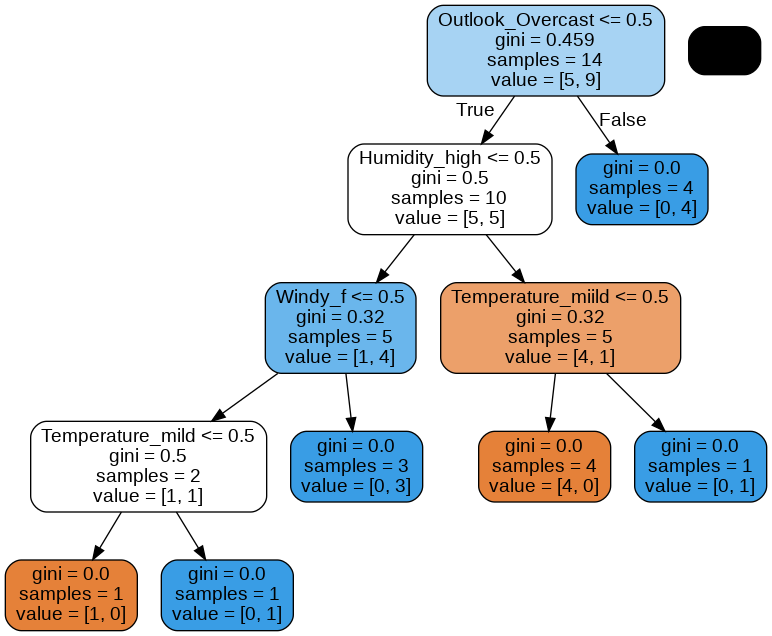

In [ ]:
Image(graph.create_png())

Testing prediction model

In [ ]:
prediction = clf_train.predict([[0,0,1,0,1,0,0,1,1,0]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


ValueError: ignored